# Лабораторная работа №4
## Линейные модели, SVM и деревья решений

### Задание:
1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите следующие модели:
    - одну из линейных моделей (линейную или полиномиальную регрессию при решении задачи регрессии, логистическую регрессию при решении задачи классификации);
    - SVM;
    - дерево решений.
5. Оцените качество моделей с помощью двух подходящих для задачи метрик. Сравните качество полученных моделей.
6. Постройте график, показывающий важность признаков в дереве решений.
7. Визуализируйте дерево решений или выведите правила дерева решений в текстовом виде.

В качестве исходных данных возьмём датасет расхода топлива автомобилей в Канаде 2022 года
В этой лабораторной работе будем решать задачу классификации
Целевой признак - Cylinders

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score
from sklearn.tree import DecisionTreeClassifier
import graphviz 
import operator
from sklearn.tree import export_graphviz
from sklearn import tree
from operator import itemgetter

In [104]:
data = pd.read_csv("fruit_data_with_colors.txt", sep = '\s+')

In [105]:
#Первые 5 записей датасета
data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [106]:
#Целевой признак
data.fruit_label.unique()

array([1, 2, 3, 4], dtype=int64)

In [107]:
#Проверка наличия пустых значений
data.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [108]:
#Размер исходного датасета
data.shape

(59, 7)

In [109]:
#Проверка типов
data.dtypes

fruit_label        int64
fruit_name        object
fruit_subtype     object
mass               int64
width            float64
height           float64
color_score      float64
dtype: object

In [110]:
#Удаление ненужных столбцов
data = data.drop(columns=["fruit_name", "fruit_subtype"], axis=1)

<AxesSubplot:>

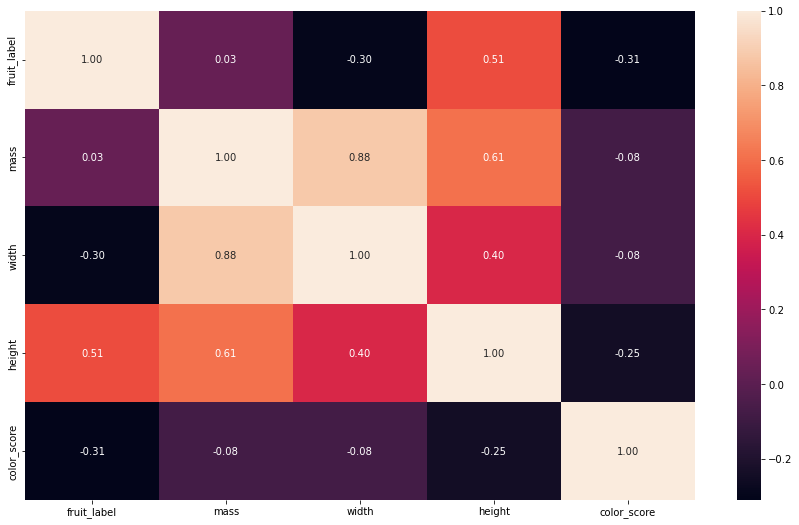

In [111]:
fig, ax = plt.subplots(figsize=(15,9))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [112]:
xArray = data.drop("fruit_label", axis=1)
yArray = data["fruit_label"]

In [113]:
#yArray[yArray==4] = 1
#yArray[yArray==2] = 3
#yArray

In [114]:
#Разделяем выборку для обучения модели
trainX, testX, trainY, testY = train_test_split(xArray, yArray, test_size=0.2, random_state=1)


## Линейная регрессия

In [115]:
#Обучение модели
LR = LogisticRegression()
LR.fit(trainX, trainY)

D:\Programs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [116]:
#Предсказание целевого признака
predict = LR.predict(testX)
predict

array([4, 1, 4, 4, 1, 1, 1, 1, 1, 4, 4, 2], dtype=int64)

In [117]:
#Вычисление вероятности попадания в той или иной класс
predictpr = LR.predict_proba(testX)
predictpr

array([[2.43796868e-03, 7.65624785e-04, 8.74803691e-03, 9.88048370e-01],
       [5.65347532e-01, 6.68668806e-04, 4.23376688e-01, 1.06071112e-02],
       [3.29239424e-01, 1.93378885e-02, 2.67662163e-01, 3.83760524e-01],
       [6.76747930e-02, 5.76027828e-05, 3.42672912e-01, 5.89594692e-01],
       [3.96765995e-01, 2.24837803e-02, 3.02429597e-01, 2.78320628e-01],
       [4.55111306e-01, 1.29814848e-01, 1.63167795e-01, 2.51906050e-01],
       [4.35584192e-01, 8.88377936e-03, 3.62380302e-01, 1.93151727e-01],
       [6.33868262e-01, 5.41540306e-03, 3.34241214e-01, 2.64751211e-02],
       [6.10341317e-01, 1.42765098e-02, 3.09996262e-01, 6.53859118e-02],
       [9.18509157e-03, 1.08399964e-02, 1.45052209e-02, 9.65469691e-01],
       [1.28620067e-02, 1.39994737e-05, 1.09498358e-01, 8.77625636e-01],
       [1.60044126e-01, 8.20588273e-01, 1.44139175e-02, 4.95368344e-03]])

In [118]:
#Оценка качества модели
balanced_accuracy_score(testY, LR.predict(testX))

0.75

## SVM

In [119]:
#Обучение модели
svm = SVC(kernel='rbf', probability=True)
svm.fit(trainX, trainY) 

SVC(probability=True)

In [120]:
#Предсказание целевого признака
svm.predict_proba(testX)

array([[0.32449325, 0.09021726, 0.2946632 , 0.2906263 ],
       [0.42117335, 0.00708807, 0.31751265, 0.25422593],
       [0.383647  , 0.03009156, 0.31057567, 0.27568577],
       [0.41584528, 0.00418598, 0.33374801, 0.24622073],
       [0.36711987, 0.04387888, 0.30859912, 0.28040213],
       [0.3609832 , 0.0496007 , 0.30748884, 0.28192725],
       [0.40092642, 0.01841904, 0.31182454, 0.26883   ],
       [0.40770424, 0.0145764 , 0.31247432, 0.26524504],
       [0.39722167, 0.02079969, 0.31147686, 0.27050179],
       [0.25810931, 0.18694101, 0.24547657, 0.30947311],
       [0.41167616, 0.00411801, 0.3381939 , 0.24601194],
       [0.06483609, 0.72911246, 0.06734765, 0.1387038 ]])

In [121]:
#Оценка качества модели
balanced_accuracy_score(testY, svm.predict(testX))

0.25

In [122]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #Можно проверить все ли метки классов предсказываются
    #print(np.unique(Z))
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_cl(clf):
    title = clf.__repr__
    clf.fit(trainX, trainY)
    fig, ax = plt.subplots(figsize=(5,5))
    X0, X1 = trainX['width'], trainX['height']
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=iris_y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('width')
    ax.set_ylabel('height')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()

## Деревья решений

In [123]:
#Обучение модели
DeTree = DecisionTreeClassifier(random_state=1)
DeTree.fit(trainX, trainY)

DecisionTreeClassifier(random_state=1)

In [124]:
#Оценка качества модели
balanced_accuracy_score(testY, DeTree.predict(testX))

1.0

Как показала оценка качества модели, метод дерева решений работает наилучшим образом

In [125]:
#Функция построения графика для вывода признаков, наиболее важных для определения целевого признака
def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

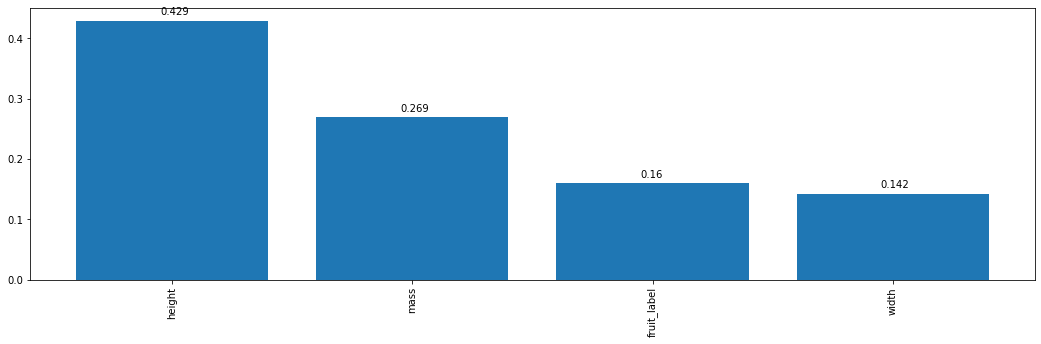

In [126]:
diagram, _ = draw_feature_importances(DeTree, data)

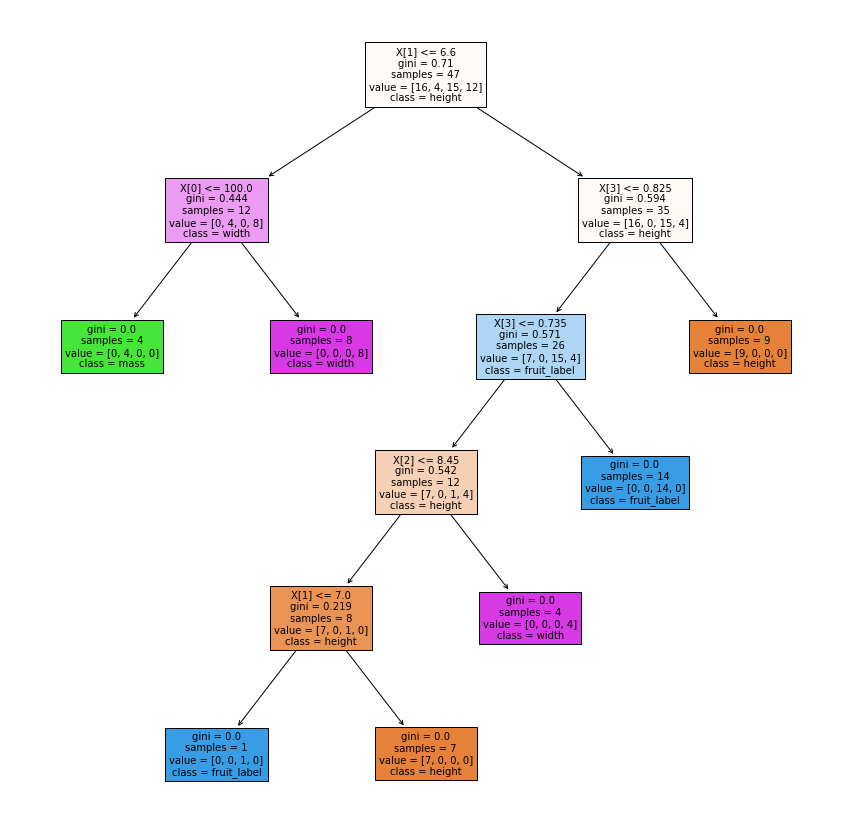

In [127]:
#Визуальное отображение дерева решений
fig, ax = plt.subplots(figsize=(15, 15))
cn=['height', 'mass', 'fruit_label', 'width' ]
tree.plot_tree(DeTree, fontsize=10,class_names=cn, filled=True)
plt.show()